<a href="https://colab.research.google.com/github/ashleymuoki/credit_card_fraud_detection/blob/main/credit_card_fraud_detection_using_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

path = "/content/drive/MyDrive/creditcard.csv"
df = pd.read_csv(path)
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


How many are fraud and how many are not fraud

In [11]:
class_names = {0:'Not fraud', 1:'Fraud'}
print(df.Class.value_counts().rename(index = class_names))

Not fraud    284315
Fraud           492
Name: Class, dtype: int64


Plotting the variables using subplots

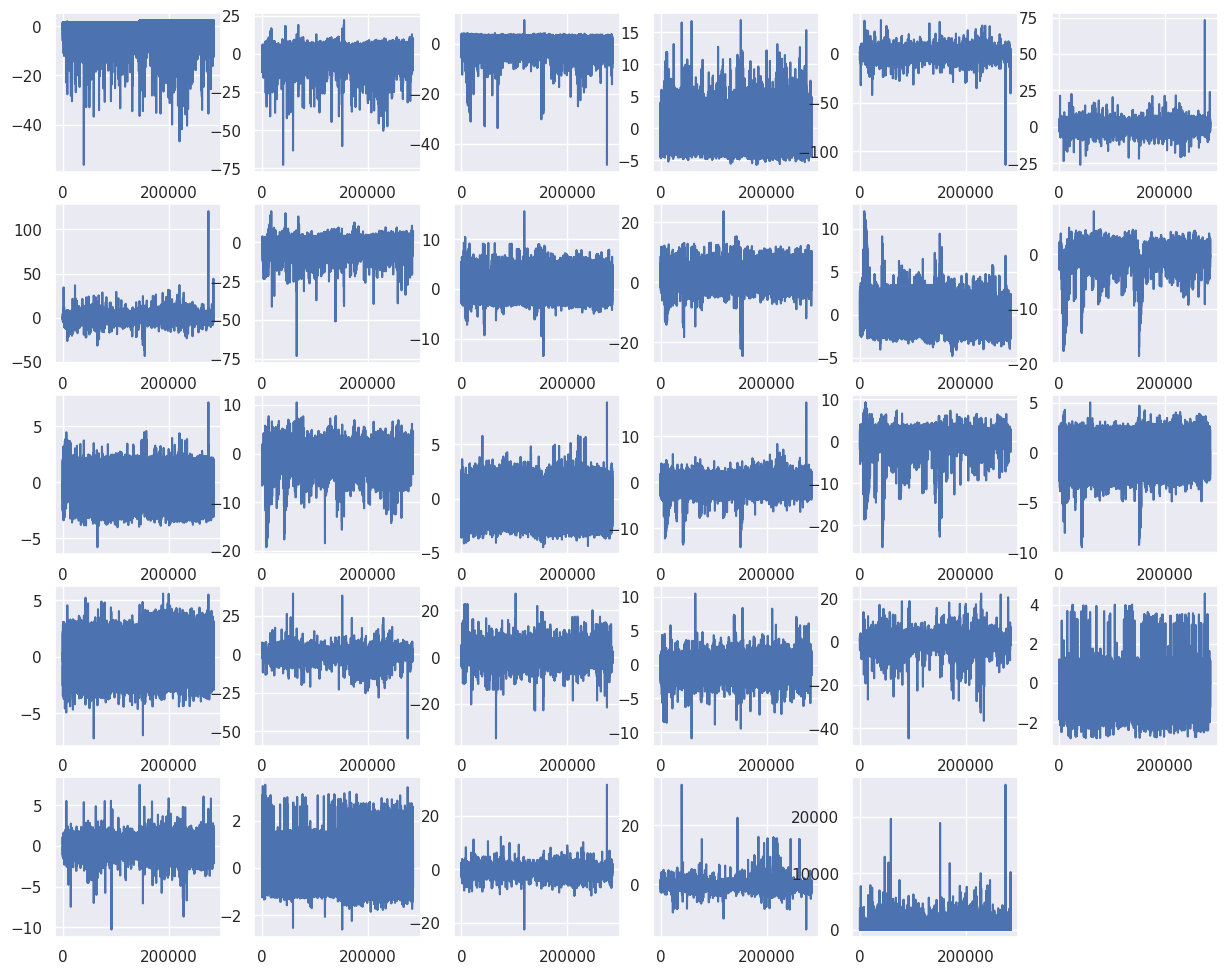

In [12]:
fig = plt.figure(figsize = (15,12))

plt.subplot(5, 6, 1); plt.plot(df.V1); plt.subplot(5,6,15); plt.plot(df.V15)
plt.subplot(5,6,2); plt.plot(df.V2); plt.subplot(5,6,16); plt.plot(df.V16)
plt.subplot(5,6,3); plt.plot(df.V3); plt.subplot(5,6,17); plt.plot(df.V17)
plt.subplot(5,6,4); plt.plot(df.V4); plt.subplot(5,6,18); plt.plot(df.V18)
plt.subplot(5,6,5); plt.plot(df.V5); plt.subplot(5,6,19); plt.plot(df.V19)
plt.subplot(5,6,6); plt.plot(df.V6); plt.subplot(5,6,20); plt.plot(df.V20)
plt.subplot(5,6,7); plt.plot(df.V7); plt.subplot(5,6,21); plt.plot(df.V21)
plt.subplot(5,6,8); plt.plot(df.V8); plt.subplot(5,6,22); plt.plot(df.V22)
plt.subplot(5,6,9); plt.plot(df.V9); plt.subplot(5,6,23); plt.plot(df.V23)
plt.subplot(5,6,10); plt.plot(df.V10); plt.subplot(5,6,24); plt.plot(df.V24)
plt.subplot(5,6,11); plt.plot(df.V11); plt.subplot(5,6,25); plt.plot(df.V25)
plt.subplot(5,6,12); plt.plot(df.V12); plt.subplot(5,6,26); plt.plot(df.V26)
plt.subplot(5,6,13); plt.plot(df.V13); plt.subplot(5,6,27); plt.plot(df.V27)
plt.subplot(5,6,14); plt.plot(df.V14); plt.subplot(5,6,28); plt.plot(df.V28)
plt.subplot(5,6,29); plt.plot(df.Amount)
plt.show()

Split data for training and testing

In [13]:
from sklearn.model_selection import train_test_split


In [14]:
feature_names = df.iloc[:, 1:30].columns
target = df.iloc[:1,30: ].columns
print(feature_names)
print(target)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
Index(['Class'], dtype='object')


In [15]:
data_features = df[feature_names]
data_target = df[target]

In [21]:
from pandas.core.common import random_state
x_train, x_test, y_train, y_test = train_test_split(data_features, data_target, train_size = 0.70, test_size = 0.30, random_state=1)
print("length of x_train is:{x_train}".format(x_train= len(x_train)))
print("length of x_test is:{x_test}".format(x_test= len(x_test)))
print("length of y_train is:{y_train}".format(y_train= len(y_train)))
print("length of y_test is:{y_test}".format(y_test= len(y_test)))

length of x_train is:199364
length of x_test is:85443
length of y_train is:199364
length of y_test is:85443


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [23]:
model = LogisticRegression()
model.fit(x_train, y_train.values.ravel())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
pred = model .predict(x_test)

In [ ]:
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(y_test, pred)
#Create pandas dataframe
dataframe = pd.DateOffsetataframe(matrix, index=class_names, columns=class_names)
#create heatmap
sns.heatmap(dataframe, annot=True, cbar = None, cmap="Blues", fmt ='g')
plt.title("Confusuion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

Evaluation :
For a financial institution dealing with identifying fraud, Sensitivity and F1 - Score might be more important metrics. F1- Score reprsents a more balanced result as it is the harmonic mean between Precision and Recall. Sensitivity is more important in the sense that we are more interested in identifying fraud than than identifying legitimate customers.

In [27]:
from sklearn.metrics import f1_score, recall_score
f1_score = round(f1_score(y_test, pred), 2)
recall_score = round(recall_score(y_test, pred), 2)
print("Sensitivity/Recall for logistic Regression Model 1:{recall_score}".format(recall_score = recall_score))
print("F1 Score for logistic Regression Model 1 : {f1_score}". format(f1_score = f1_score))


Sensitivity/Recall for logistic Regression Model 1:0.58
F1 Score for logistic Regression Model 1 : 0.68
